# Emergency - 911 Calls Project

I will analyse some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [16]:
df= pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [18]:
df['timeStamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 663522 entries, 0 to 663521
Series name: timeStamp
Non-Null Count   Dtype 
--------------   ----- 
663522 non-null  object
dtypes: object(1)
memory usage: 5.1+ MB


In [19]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [20]:
df['timeStamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 663522 entries, 0 to 663521
Series name: timeStamp
Non-Null Count   Dtype         
--------------   -----         
663522 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.1 MB


In [22]:
df['Year']= df['timeStamp'].dt.year
df['Month']= df['timeStamp'].dt.month
df['Day']= df['timeStamp'].dt.day
df['Hour']= df['timeStamp'].dt.hour
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Hour,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10,17,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10,17,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,2015,12,10,14,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10,16,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10,16,3


I will map the day of the week transforming it from numerical to categorical

In [23]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [24]:
df['Day of Week']= df['Day of Week'].map(dmap)

In [25]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Hour,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10,17,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10,17,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,2015,12,10,14,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10,16,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10,16,Thu


I will conduct some analyses on Reason of the tasks:

In [28]:
df['Reason']=df['title'].apply(lambda x: x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Hour,Day of Week,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10,17,Thu,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10,17,Thu,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,2015,12,10,14,Thu,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10,16,Thu,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10,16,Thu,EMS


Text(0.5, 1.0, 'Trend of tasks during the week days')

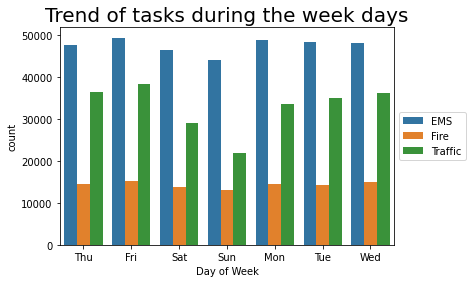

In [33]:
sns.countplot(x='Day of Week',data=df, hue='Reason')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Trend of tasks during the week days', fontsize=20)

Text(0.5, 1.0, 'Trend of tasks per month')

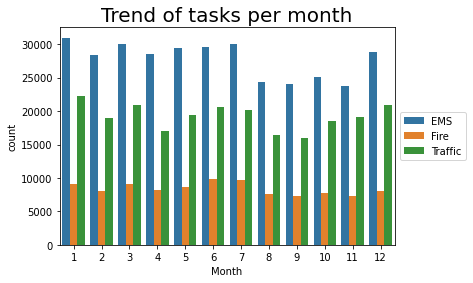

In [35]:
sns.countplot(x='Month',data=df, hue='Reason')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Trend of tasks per month', fontsize=20)


I will analyse further the month trend (therefore how many times some tasks were required):

In [37]:
month_trend=df.groupby('Month').count()
month_trend

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Day,Hour,Day of Week,Reason
Month,,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213,47213,47213


Text(0.5, 1.0, 'Trend of tasks during the months')

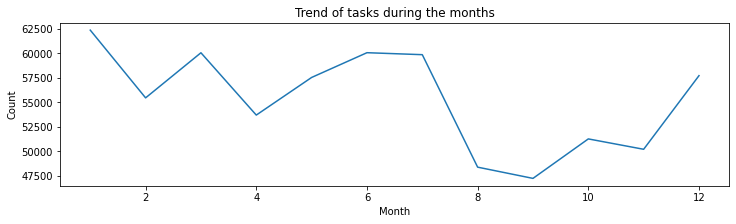

In [44]:
fig, axes = plt.subplots(figsize=(12,3)) 

# Now use the axes object to add stuff to plot
axes.plot(month_trend.index, month_trend["Reason"])
axes.set_xlabel('Month')
axes.set_ylabel('Count')
axes.set_title('Trend of tasks during the months')


Time-series furhter analysis:

In [46]:
df['Date']=df['timeStamp'].apply(lambda x: x.date())

In [47]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Hour,Day of Week,Reason,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10,17,Thu,EMS,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10,17,Thu,EMS,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,2015,12,10,14,Thu,Fire,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10,16,Thu,EMS,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10,16,Thu,EMS,2015-12-10


In [48]:
df_Date=df.groupby('Date').count()
df_Date.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Hour,Day of Week,Reason
Date,,,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444,444,444


Text(0.5, 1.0, 'Trend of tasks during the years')

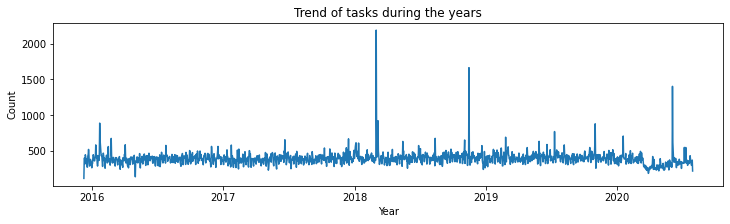

In [51]:
fig, axes = plt.subplots(figsize=(12,3)) 

# Now use the axes object to add stuff to plot
axes.plot(df_Date.index, df_Date['lat'])
axes.set_xlabel('Year')
axes.set_ylabel('Count')
axes.set_title('Trend of tasks during the years')

I will create 3 separate plots with each plot representing a Reason for the 911 call:

In [53]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

##### EMS:

In [58]:
df_ems=df[df['Reason']=='EMS']
df_ems.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Hour,Day of Week,Reason,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10,17,Thu,EMS,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10,17,Thu,EMS,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10,16,Thu,EMS,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10,16,Thu,EMS,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,2015,12,10,15,Thu,EMS,2015-12-10


In [59]:
df_ems=df_ems.groupby('Date').count()
df_ems.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Hour,Day of Week,Reason
Date,,,,,,,,,,,,,,,
2015-12-10,58,58,58,53,58,58,58,58,58,58,58,58,58,58,58
2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186,186,186


Text(0.5, 1.0, 'Trend of EMS tasks during the years')

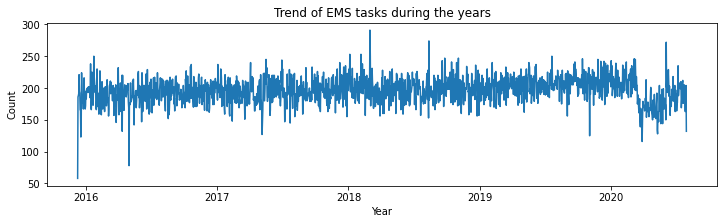

In [60]:
fig, axes = plt.subplots(figsize=(12,3)) 

# Now use the axes object to add stuff to plot
axes.plot(df_ems.index, df_ems['lat'])
axes.set_xlabel('Year')
axes.set_ylabel('Count')
axes.set_title('Trend of EMS tasks during the years')

##### Traffic:

In [61]:
df_traffic=df[df['Reason']=='Traffic']
df_traffic.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Hour,Day of Week,Reason,Date
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,2015,12,10,17,Thu,Traffic,2015-12-10
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:33:50,MONTGOMERY,RT202 PKWY & KNAPP RD,1,2015,12,10,17,Thu,Traffic,2015-12-10
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 16:32:10,PLYMOUTH,BROOK RD & COLWELL LN,1,2015,12,10,16,Thu,Traffic,2015-12-10
12,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:15:49,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,2015,12,10,17,Thu,Traffic,2015-12-10
13,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:12:47,CHELTENHAM,OLD YORK RD & VALLEY RD,1,2015,12,10,17,Thu,Traffic,2015-12-10


In [62]:
df_traffic=df_traffic.groupby('Date').count()
df_traffic.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Hour,Day of Week,Reason
Date,,,,,,,,,,,,,,,
2015-12-10,41,41,41,34,41,41,41,41,41,41,41,41,41,41,41
2015-12-11,137,137,137,107,137,137,137,137,137,137,137,137,137,137,137


Text(0.5, 1.0, 'Trend of Traffic tasks during the years')

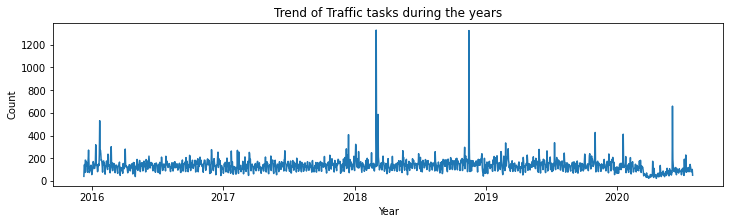

In [63]:
fig, axes = plt.subplots(figsize=(12,3)) 

# Now use the axes object to add stuff to plot
axes.plot(df_traffic.index, df_traffic['lat'])
axes.set_xlabel('Year')
axes.set_ylabel('Count')
axes.set_title('Trend of Traffic tasks during the years')

##### Fire:

In [64]:
df_fire=df[df['Reason']=='Fire']
df_fire.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Hour,Day of Week,Reason,Date
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,2015,12,10,14,Thu,Fire,2015-12-10
22,40.199006,-75.300058,LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...,19446.0,Fire: APPLIANCE FIRE,2015-12-10 17:59:24,UPPER GWYNEDD,LILAC CT & PRIMROSE DR,1,2015,12,10,17,Thu,Fire,2015-12-10
27,40.028903,-75.351822,EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2015-...,19085.0,Fire: CARBON MONOXIDE DETECTOR,2015-12-10 18:05:19,DELAWARE COUNTY,EDENTON PL & DURHAM DR,1,2015,12,10,18,Thu,Fire,2015-12-10
39,40.104206,-75.367665,HAMPTON RD & BELMONT RD; UPPER MERION; 2015-12...,19406.0,Fire: GAS-ODOR/LEAK,2015-12-10 18:32:25,UPPER MERION,HAMPTON RD & BELMONT RD,1,2015,12,10,18,Thu,Fire,2015-12-10
45,40.224923,-75.528045,LINFIELD TRAPPE RD; LIMERICK; 2015-12-10 @ 18:...,19468.0,Fire: VEHICLE ACCIDENT,2015-12-10 18:50:23,LIMERICK,LINFIELD TRAPPE RD,1,2015,12,10,18,Thu,Fire,2015-12-10


In [66]:
df_fire=df_fire.groupby('Date').count()
df_fire.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Hour,Day of Week,Reason
Date,,,,,,,,,,,,,,,
2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15,15,15
2015-12-11,68,68,68,59,68,68,68,68,68,68,68,68,68,68,68


Text(0.5, 1.0, 'Trend of Fire tasks during the years')

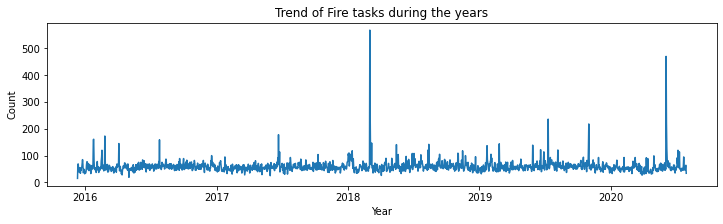

In [67]:
fig, axes = plt.subplots(figsize=(12,3)) 

# Now use the axes object to add stuff to plot
axes.plot(df_fire.index, df_fire['lat'])
axes.set_xlabel('Year')
axes.set_ylabel('Count')
axes.set_title('Trend of Fire tasks during the years')

I will analyse the correlation between the days of week and the hours regarding the number of tasks:

In [68]:
df_pivot_group= df.groupby(by=['Day of Week','Hour']).count()
df_pivot_group

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
Day of Week Hour                                                               
Fri         0     1983  1983  1983  1752   1983       1983  1981  1983  1983   
            1     1635  1635  1635  1451   1635       1635  1632  1635  1635   
            2     1449  1449  1449  1311   1449       1449  1449  1449  1449   
            3     1296  1296  1296  1173   1296       1296  1296  1296  1296   
            4     1339  1339  1339  1227   1339       1339  1338  1339  1339   
...                ...   ...   ...   ...    ...        ...   ...   ...   ...   
Wed         19    4686  4686  4686  4165   4686       4686  4684  4686  4686   
            20    4116  4116  4116  3661   4116       4116  4113  4116  4116   
            21    3537  3537  3537  3143   3537       3537  3530  3537  3537   
            22    2826  2826  2826  2511   2826       2826  2825  2826  2826   
            23    2207  2207  2207  1965   2207       2207  2204  2207  2207   

                  Year  Month   Day  Reason  Date  
Day of Week Hour                                   
Fri         0     1983   1983  1983    1983  1983  
            1     1635   1635  1635    1635  1635  
            2     1449   1449  1449    1449  1449  
            3     1296   1296  1296    1296  1296  
            4     1339   1339  1339    1339  1339  
...                ...    ...   ...     ...   ...  
Wed         19    4686   4686  4686    4686  4686  
            20    4116   4116  4116    4116  4116  
            21    3537   3537  3537    3537  3537  
            22    2826   2826  2826    2826  2826  
            23    2207   2207  2207    2207  2207  

[168 rows x 14 columns]

In [71]:
df_pivot= pd.pivot_table(df_pivot_group, values='Reason', index=['Day of Week'], columns=['Hour'], aggfunc=sum) 
df_pivot

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

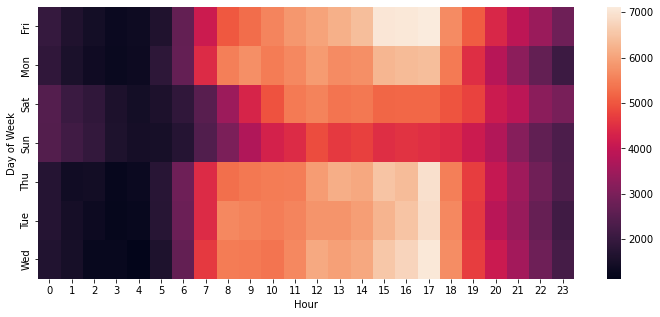

In [70]:
plt.figure(figsize=(12,5))
sns.heatmap(df_pivot)

Similarly, I will analyse the correlation between Month and the Days of week:

In [84]:
df_pivot_group= df.groupby(by=['Month','Day of Week']).count()
df_pivot_group

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
Month Day of Week                                                               
1     Fri          9309  9309  9309  8238   9309       9309  9305  9309  9309   
      Mon          8896  8896  8896  7900   8896       8896  8894  8896  8896   
      Sat          8475  8475  8475  7522   8475       8475  8467  8475  8475   
      Sun          7478  7478  7478  6618   7478       7478  7476  7478  7478   
      Thu          9055  9055  9055  8038   9055       9055  9053  9055  9055   
...                 ...   ...   ...   ...    ...        ...   ...   ...   ...   
12    Sat          8592  8592  8592  7417   8592       8592  8588  8592  8592   
      Sun          7165  7165  7165  6392   7165       7165  7162  7165  7165   
      Thu          8151  8151  8151  7167   8151       8151  8147  8151  8151   
      Tue          8305  8305  8305  7289   8305       8305  8301  8305  8305   
      Wed          7682  7682  7682  6788   7682       7682  7677  7682  7682   

                   Year   Day  Hour  Reason  Date  
Month Day of Week                                  
1     Fri          9309  9309  9309    9309  9309  
      Mon          8896  8896  8896    8896  8896  
      Sat          8475  8475  8475    8475  8475  
      Sun          7478  7478  7478    7478  7478  
      Thu          9055  9055  9055    9055  9055  
...                 ...   ...   ...     ...   ...  
12    Sat          8592  8592  8592    8592  8592  
      Sun          7165  7165  7165    7165  7165  
      Thu          8151  8151  8151    8151  8151  
      Tue          8305  8305  8305    8305  8305  
      Wed          7682  7682  7682    7682  7682  

[84 rows x 14 columns]

In [85]:
df_pivot= pd.pivot_table(df_pivot_group, values='Reason', index=['Day of Week'], columns=['Month'], aggfunc=sum) 
df_pivot.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

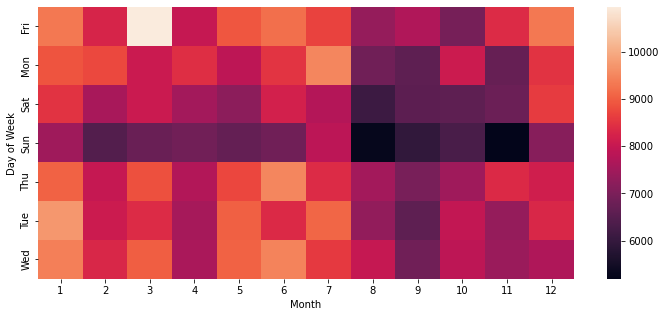

In [86]:
plt.figure(figsize=(12,5))
sns.heatmap(df_pivot)